In [15]:
from typing import Callable
from numpy.typing import NDArray
import numpy as np


def compute_fourier(x : NDArray,f : Callable):
    y = f(x)
    N = len(y)
    T = (x[-1] - x[0]) / (N - 1)
    # T = 1/f where f: Sampling frequency
    
    yf = np.fft.fft(y)
    xf = np.fft.fftfreq(N, T)[:N // 2]
    yf = 2.0 / N * np.abs(yf[:N // 2])
    return xf, yf

def plot_fourier(ax, x, f):
    xf,yf = compute_fourier(x,f)
    ax.plot(xf, yf)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')
    ax.set_title('Fourier Transform')
    return ax
    
def plot_original(ax, x, f):
    ax.plot(x, f(x))
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title('Original Signal')
    return ax


<Axes: title={'center': 'Fourier Transform'}, xlabel='Frequency', ylabel='Amplitude'>

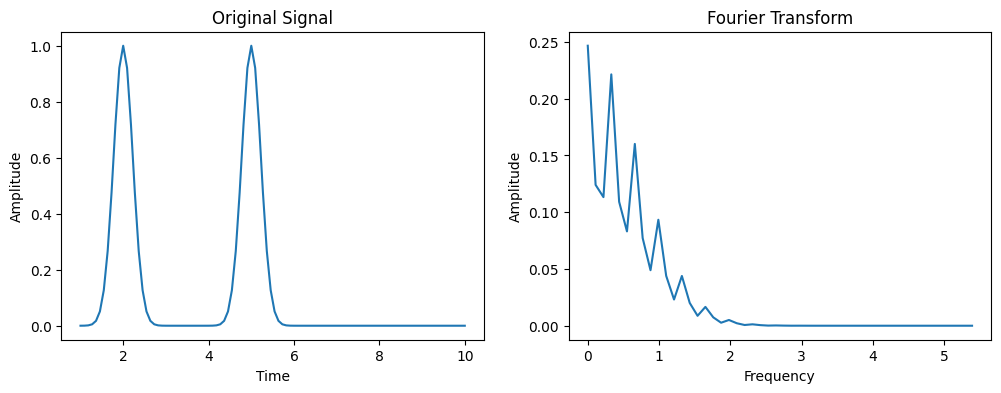

In [36]:
from matplotlib import pyplot as plt


def gaussian(x, a=10):
    return np.exp(-a*(x-2)**2) + np.exp(-a*(x-5)**2)

def delta(x):
    return np.where(abs(x-3)<epsilon, 1, 0) + np.where(abs(x-4)<epsilon, 1, 0)

epsilon = 1e-3
x1 = np.linspace(1,10, 100)
func = gaussian

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_original(ax1, x1, func)
plot_fourier(ax2, x1, func)